# 1-1 加载Keras中的MNIST数据集


In [30]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

**train_images 和 train_lables**组成了training set，模型将从这些数据中进行学习。然后test set上对模型进行测试。

图像被编译成Numpy数组，而标签时数字数组，取值范围为0～9

看一下训练数据：

In [31]:
train_images.shape

(60000, 28, 28)

In [32]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [33]:
test_images.shape

(10000, 28, 28)

In [34]:
len(test_labels)

10000

In [35]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# 1-2 网络架构

In [36]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu',input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

### network explanation

    layer 核心组件，一种数据处理模块，可看作数据过滤器。
    Dense 全连接的神经层，
    softmax 返回由n个概率值（总和为一）组成的数组
    

### parameters

    loss function 损失函数
    optimizer 优化器
    metric 需要被监控的指标

# 1-3 编译步骤

In [37]:
network.compile(optimizer = 'rmsprop',
               loss ='categorical_crossentropy',
               metrics = ['accuracy'])

# 1-4 准备图像数据

In [38]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# 1-5 准备标签

In [39]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 1-6 训练

In [40]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2542 - accuracy: 0.9267
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1052 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0685 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0500 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0368 - accuracy: 0.9892


# 1-7 测试

In [41]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0658 - accuracy: 0.9793


# 2-1 数据表示

In [42]:
from keras.datasets import mnist
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


# 2-2 显示数字

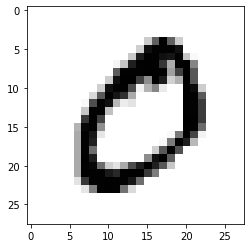

In [43]:
digit = train_images[1]

import matplotlib.pyplot as plt
plt.imshow(digit ,cmap = plt.cm.binary)
plt.show()

# 2-3 利用Numpy